# Projeto para seguradora

## Relatorio de analise 1 </n>
#### Entendendo os dados

## Relatorio de analise 2</n>
#### Eliminando dados repetidos para visualizar todas as opções de tipos de imoveis

## Relatório de Análise 3 </n>
#### Selecionar tudo que são residencias, tabelar e salvar o arquivo

## Relatório de Análise 4 </n>
#### Seleçao de itens especificos

## Relatório de Análise 5 </n>
#### Retirando ou tratando dados nulos NaN

## Relatório de Análise 6 </n>
#### incluindo e excluindo colunas e linhas

## Relatório de Análise 7 </n>
#### Trabalhando com groupby

## Relatório de Análise 8 </n>
#### Tratando Outliers

In [36]:
### Removendo os outliers

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [38]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep= ';')

dados

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor m2,tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

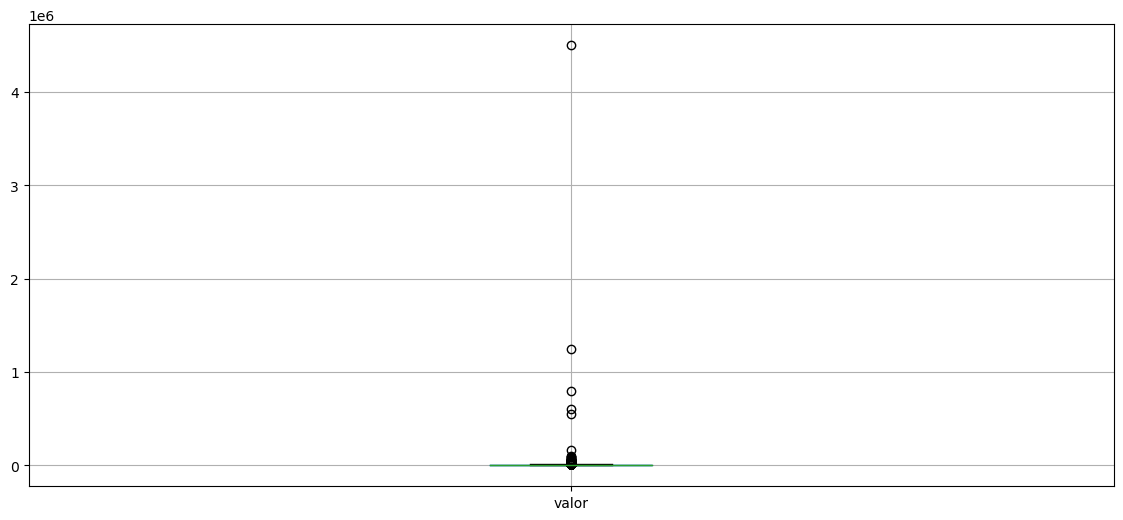

In [39]:
dados.boxplot(['valor'])
#note que aqui a discrepancia no valor deixa o grafico sem visulalizaçao, pois existem valores
# que estão muito acima do desvio padrao

In [40]:
#visualizando os outliers
dados[dados['valor'] >= 500000] #mostrar somente acima de tal valor

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor m2,tipo agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [41]:
valor = dados['valor'] #criando uma series

valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: valor, Length: 21826, dtype: float64

##### como carregar imagens no jupyter
<img src="dados/compressed_box-plot.png" width=50%>

In [52]:
#calcular os Qartios
q1 = valor.quantile(.25) #25% no primeiro quartio
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [53]:
li = (valor >= limite_inferior)
ls = (valor <= limite_superior)

selecao = (li) & (ls)

dados_new = dados[selecao]

<AxesSubplot:>

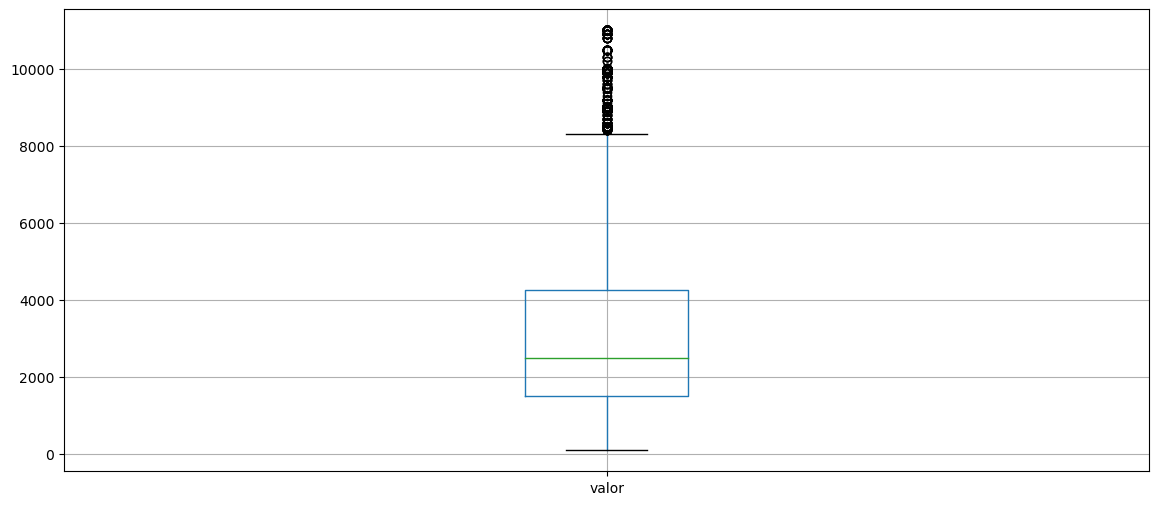

In [55]:
dados_new.boxplot(['valor'])
#seria interessante separar a tabela como alto padrao e baixo padrao

array([[<AxesSubplot:title={'center':'valor'}>]], dtype=object)

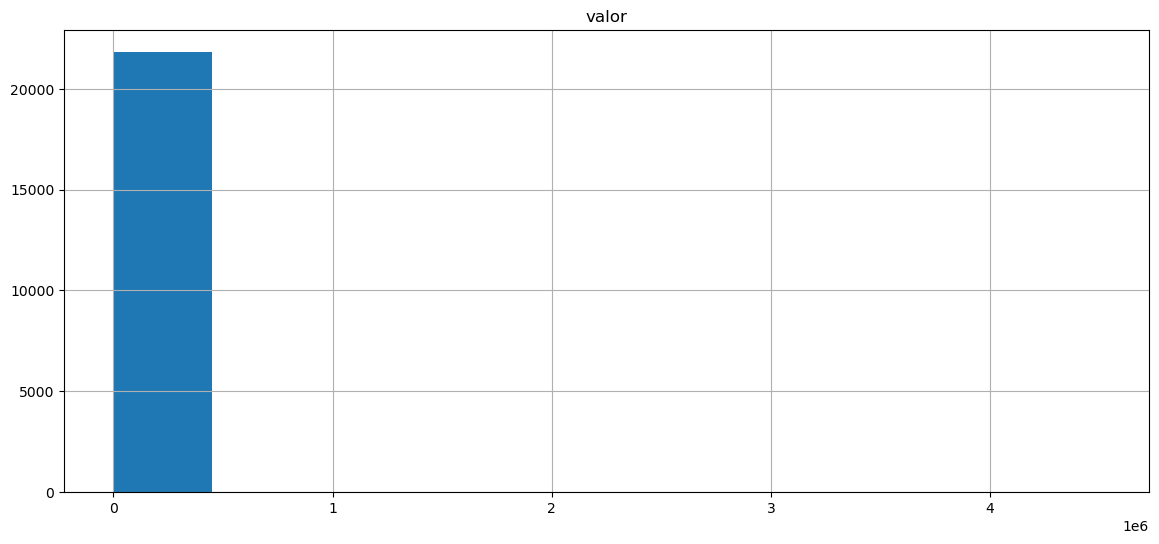

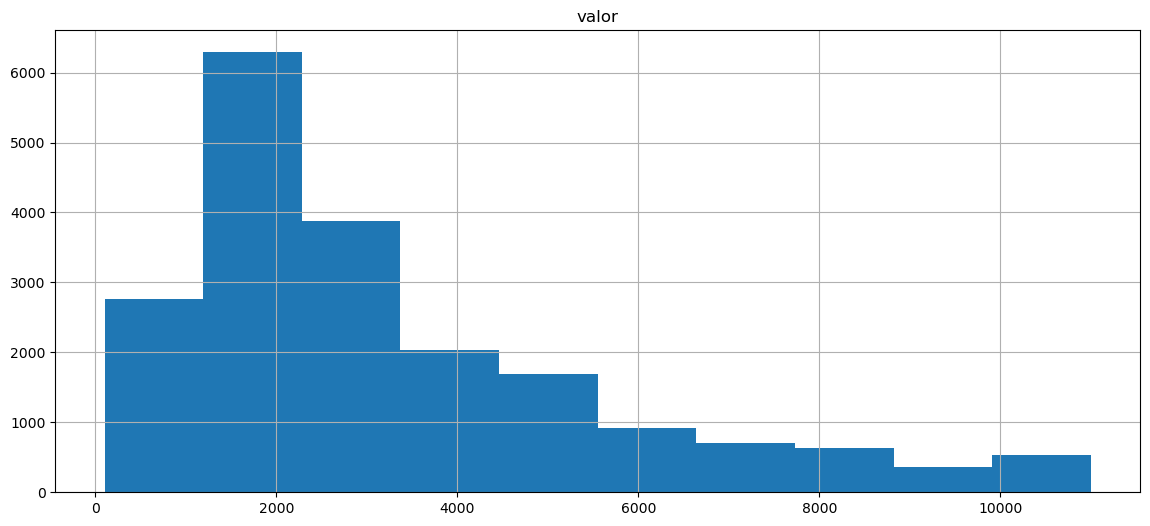

In [57]:
dados.hist(['valor']) #com outlier
dados_new.hist(['valor']) #sem outlier
#comparar um grafico com o outro

#### <font color="yellow"> Exercicio - 8 </font>

In [59]:
ex = pd.read_csv('dados/aluguel_amostra.csv', sep=';')

ex

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:>

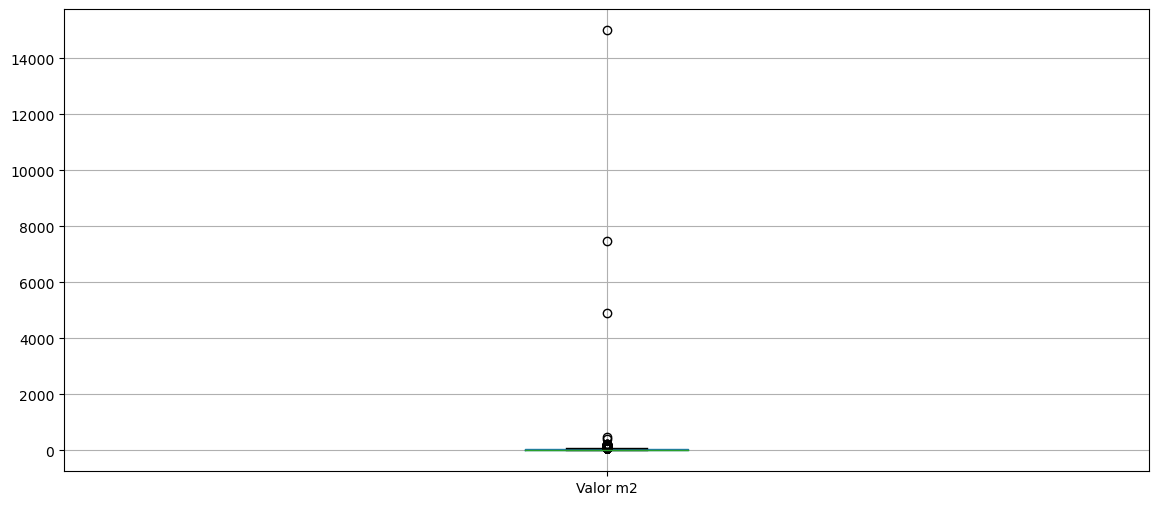

In [63]:
ex.boxplot(['Valor m2'])

In [68]:
ex_valor = ex['Valor m2']

ex_valor

0       10.00
1       13.56
2       51.02
3       55.55
4       18.46
        ...  
9995    96.88
9996    31.58
9997    40.00
9998    34.00
9999     8.33
Name: Valor m2, Length: 10000, dtype: float64

In [69]:
q1 = ex_valor.quantile(.25) #25% no primeiro quartio
q3 = ex_valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [71]:
li_ex = (ex_valor >= limite_inferior)
ls_ex = (ex_valor <= limite_superior)

selecao_ex = (li_ex) & (ls_ex)

ex_new = ex[selecao_ex]

<AxesSubplot:>

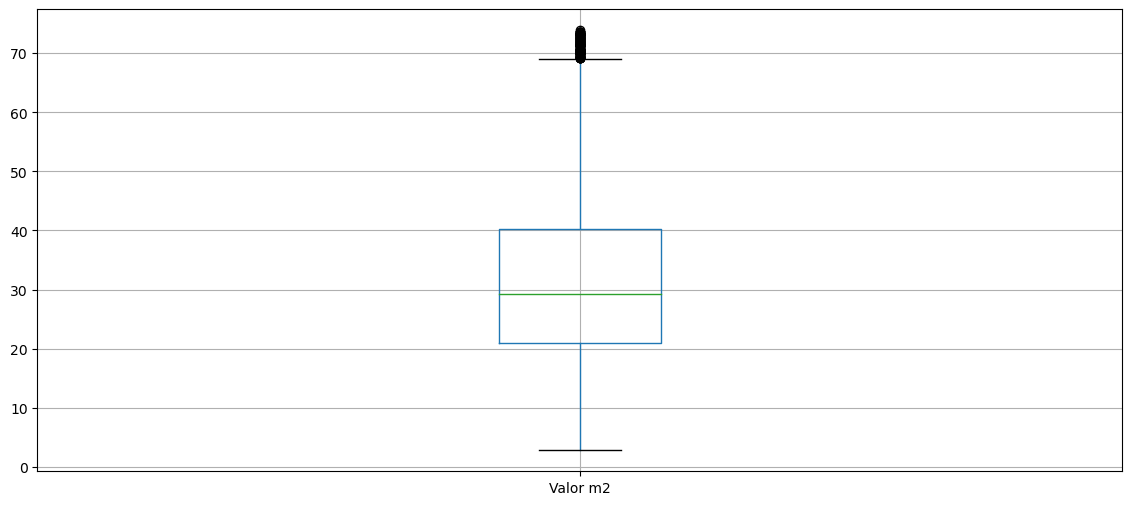

In [72]:
ex_new.boxplot(['Valor m2'])

#### <font color="yellow"> Fim Exercicio </font>

#### analise por grupos

<AxesSubplot:title={'center':'valor'}, xlabel='[tipo]'>

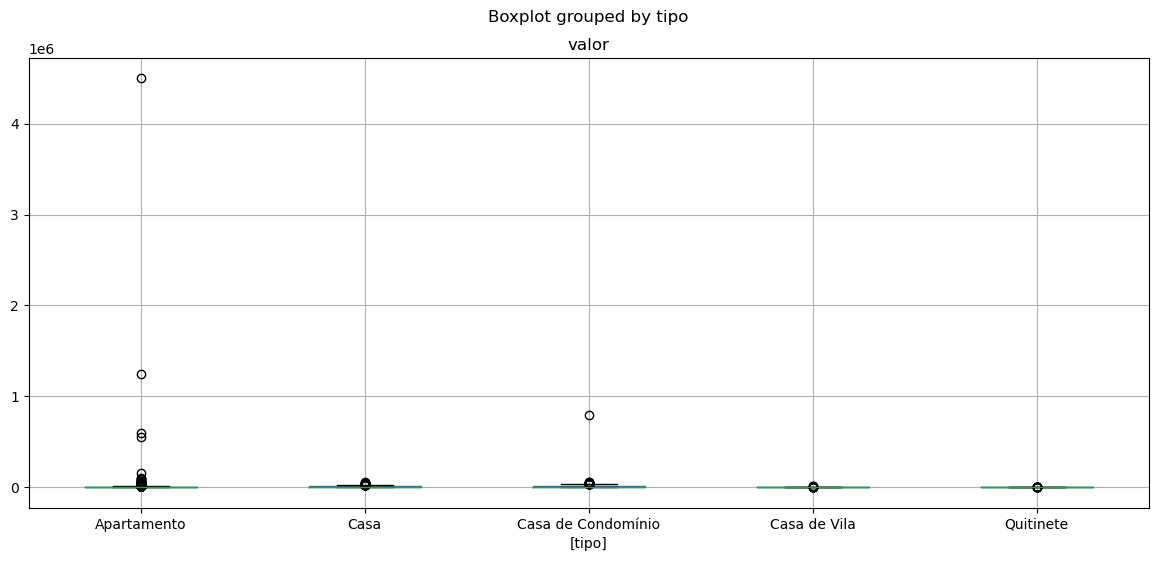

In [75]:
dados.boxplot(['valor'], by = ['tipo']) #vai fazer 1 grafico para cado tipo
#mas observe os outliers

In [81]:
grupo_tipo = dados.groupby('tipo')['valor'] #grupo para variar somente por tipo e por valor

In [82]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [85]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [101]:
#vai fazer para cada um dos dados que contenha no grupo_tipo
q1 = grupo_tipo.quantile(.25) #25% no primeiro quartio
q3 = grupo_tipo.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [91]:
q1

tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: valor, dtype: float64

In [92]:
q3

tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: valor, dtype: float64

In [93]:
iiq

tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: valor, dtype: float64

In [94]:
limite_inferior

tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: valor, dtype: float64

In [95]:
limite_superior

tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: valor, dtype: float64

In [96]:
#acessando o apartamento do limite superior
limite_superior['Apartamento']

9950.0

In [97]:
for tipo in grupo_tipo.groups.keys():
    print(tipo) #vai pegar as chaves da seleçao grupo_tipo

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [107]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['tipo'] == tipo
    eh_dentro_limite = (dados['valor'] >= limite_inferior[tipo]) & (dados['valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
    
# vai realizar uma analise para cada tipo de imovel que tem dentro do grupo_tipo

<AxesSubplot:title={'center':'valor'}, xlabel='[tipo]'>

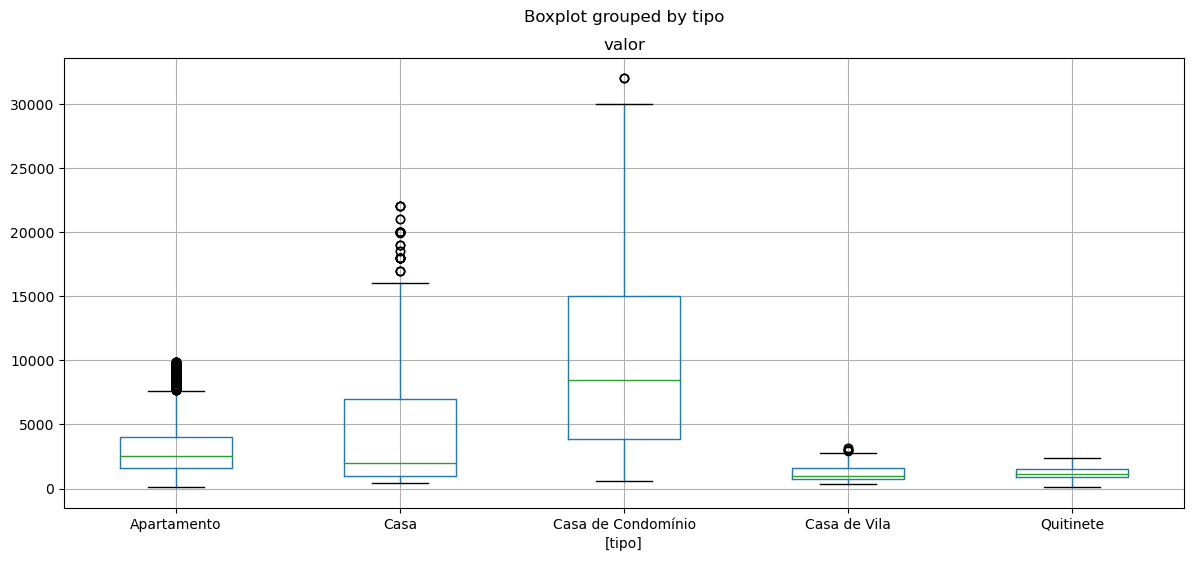

In [108]:
dados_new.boxplot(['valor'], by= ['tipo'])

In [109]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index= False)